<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(_3_6)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-3.6'

In [4]:
os.listdir(base_path)

['data_add_delta_-3.6_n20.csv',
 'data_add_delta_-3.6_n30.csv',
 'data_add_delta_-3.6_n60.csv',
 'data_add_delta_-3.6_n120.csv',
 'data_add_delta_-3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.6_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,80.544966,87.581487,22.085950,97.109177,-0.000714,297.320866,297.321637,-0.000771
1,0.0,1.0,39.598115,95.029415,77.091744,69.845994,0.000101,291.565368,291.565635,-0.000267
2,0.0,2.0,71.967969,36.621894,71.808251,81.520711,-0.000649,271.918176,271.918646,-0.000471
3,0.0,3.0,68.403396,71.861805,56.258150,23.136034,0.000238,229.659622,229.659228,0.000394
4,0.0,4.0,66.129648,48.655966,64.946375,27.511149,0.000204,217.243342,217.242898,0.000445
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,69.736954,91.056441,85.869109,32.600834,-0.000124,289.263214,289.263501,-0.000287
249996,999.0,246.0,82.538947,80.091658,88.366734,64.572516,-0.000044,325.569810,325.569942,-0.000131
249997,999.0,247.0,78.097883,50.601386,50.228343,34.232380,-0.000502,223.159491,223.159852,-0.000361
249998,999.0,248.0,96.166558,21.603742,48.738017,94.228330,-0.004686,270.731962,270.736282,-0.004320


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,80.544966,87.581487,22.085950,97.109177,-0.000714,297.320866,297.321637,-0.000771
1,0.0,1.0,39.598115,95.029415,77.091744,69.845994,0.000101,291.565368,291.565635,-0.000267
2,0.0,2.0,71.967969,36.621894,71.808251,81.520711,-0.000649,271.918176,271.918646,-0.000471
3,0.0,3.0,68.403396,71.861805,56.258150,23.136034,0.000238,229.659622,229.659228,0.000394
4,0.0,4.0,66.129648,48.655966,64.946375,27.511149,0.000204,217.243342,217.242898,0.000445
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,69.736954,91.056441,85.869109,32.600834,-0.000124,289.263214,289.263501,-0.000287
249996,999.0,246.0,82.538947,80.091658,88.366734,64.572516,-0.000044,325.569810,325.569942,-0.000131
249997,999.0,247.0,78.097883,50.601386,50.228343,34.232380,-0.000502,223.159491,223.159852,-0.000361
249998,999.0,248.0,96.166558,21.603742,48.738017,94.228330,-0.004686,270.731962,270.736282,-0.004320


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    80.544966  87.581487  22.085950  97.109177 -0.000714  297.320866   
      1.0    39.598115  95.029415  77.091744  69.845994  0.000101  291.565368   
      2.0    71.967969  36.621894  71.808251  81.520711 -0.000649  271.918176   
      3.0    68.403396  71.861805  56.258150  23.136034  0.000238  229.659622   
      4.0    66.129648  48.655966  64.946375  27.511149  0.000204  217.243342   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  69.736954  91.056441  85.869109  32.600834 -0.000124  289.263214   
      246.0  82.538947  80.091658  88.366734  64.572516 -0.000044  325.569810   
      247.0  78.097883  50.601386  50.228343  34.232380 -0.000502  223.159491   
      248.0  96.166558  21.603742  48.738017  94.228330 -0.004686  270.731962   
      249.0  21.655774  43.196594  97.291391  43.193364 -0.001850  215.335273   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    297.321637 -0.000771  
      1.0    291.565635 -0.000267  
      2.0    271.918646 -0.000471  
      3.0    229.659228  0.000394  
      4.0    217.242898  0.000445  
...                 ...       ...  
999.0 245.0  289.263501 -0.000287  
      246.0  325.569942 -0.000131  
      247.0  223.159852 -0.000361  
      248.0  270.736282 -0.004320  
      249.0  215.336808 -0.001535  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    80.544966  87.581487  22.085950  97.109177 -0.000714  297.320866   
      1.0    39.598115  95.029415  77.091744  69.845994  0.000101  291.565368   
      2.0    71.967969  36.621894  71.808251  81.520711 -0.000649  271.918176   
      3.0    68.403396  71.861805  56.258150  23.136034  0.000238  229.659622   
      4.0    66.129648  48.655966  64.946375  27.511149  0.000204  217.243342   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  69.736954  91.056441  85.869109  32.600834 -0.000124  289.263214   
      246.0  82.538947  80.091658  88.366734  64.572516 -0.000044  325.569810   
      247.0  78.097883  50.601386  50.228343  34.232380 -0.000502  223.159491   
      248.0  96.166558  21.603742  48.738017  94.228330 -0.004686  270.731962   
      249.0  21.655774  43.196594  97.291391  43.193364 -0.001850  215.335273   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    297.321637 -0.000771  
      1.0    291.565635 -0.000267  
      2.0    271.918646 -0.000471  
      3.0    229.659228  0.000394  
      4.0    217.242898  0.000445  
...                 ...       ...  
999.0 245.0  289.263501 -0.000287  
      246.0  325.569942 -0.000131  
      247.0  223.159852 -0.000361  
      248.0  270.736282 -0.004320  
      249.0  215.336808 -0.001535  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,80.544966,87.581487,22.085950,97.109177,-0.000714,297.320866,297.321637,-0.000771
1,0.0,1.0,39.598115,95.029415,77.091744,69.845994,0.000101,291.565368,291.565635,-0.000267
2,0.0,2.0,71.967969,36.621894,71.808251,81.520711,-0.000649,271.918176,271.918646,-0.000471
3,0.0,3.0,68.403396,71.861805,56.258150,23.136034,0.000238,229.659622,229.659228,0.000394
4,0.0,4.0,66.129648,48.655966,64.946375,27.511149,0.000204,217.243342,217.242898,0.000445
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,69.736954,91.056441,85.869109,32.600834,-0.000124,289.263214,289.263501,-0.000287
249996,999.0,246.0,82.538947,80.091658,88.366734,64.572516,-0.000044,325.569810,325.569942,-0.000131
249997,999.0,247.0,78.097883,50.601386,50.228343,34.232380,-0.000502,223.159491,223.159852,-0.000361
249998,999.0,248.0,96.166558,21.603742,48.738017,94.228330,-0.004686,270.731962,270.736282,-0.004320


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    80.544966  87.581487  22.085950  97.109177 -0.000714  297.320866   
      1.0    39.598115  95.029415  77.091744  69.845994  0.000101  291.565368   
      2.0    71.967969  36.621894  71.808251  81.520711 -0.000649  271.918176   
      3.0    68.403396  71.861805  56.258150  23.136034  0.000238  229.659622   
      4.0    66.129648  48.655966  64.946375  27.511149  0.000204  217.243342   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  69.736954  91.056441  85.869109  32.600834 -0.000124  289.263214   
      246.0  82.538947  80.091658  88.366734  64.572516 -0.000044  325.569810   
      247.0  78.097883  50.601386  50.228343  34.232380 -0.000502  223.159491   
      248.0  96.166558  21.603742  48.738017  94.228330 -0.004686  270.731962   
      249.0  21.655774  43.196594  97.291391  43.193364 -0.001850  215.335273   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    297.321637 -0.000771  
      1.0    291.565635 -0.000267  
      2.0    271.918646 -0.000471  
      3.0    229.659228  0.000394  
      4.0    217.242898  0.000445  
...                 ...       ...  
999.0 245.0  289.263501 -0.000287  
      246.0  325.569942 -0.000131  
      247.0  223.159852 -0.000361  
      248.0  270.736282 -0.004320  
      249.0  215.336808 -0.001535  

[250000 rows x 8 columns]

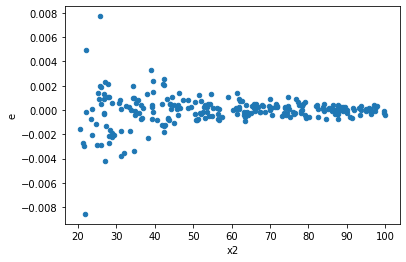

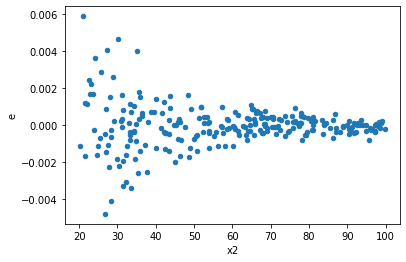

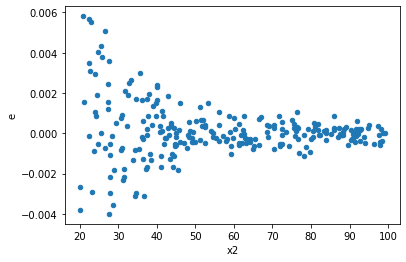

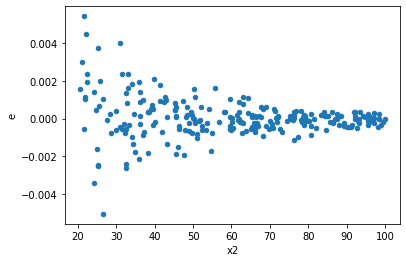

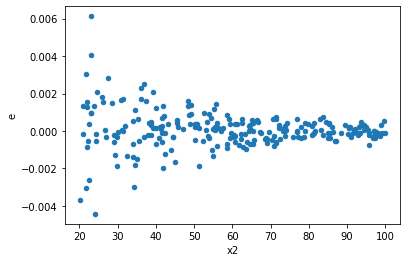

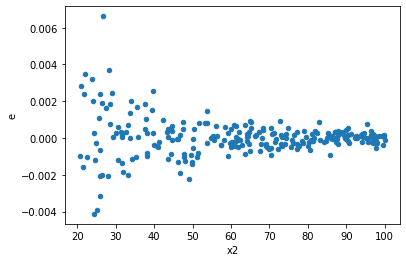

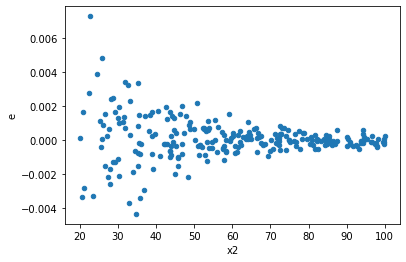

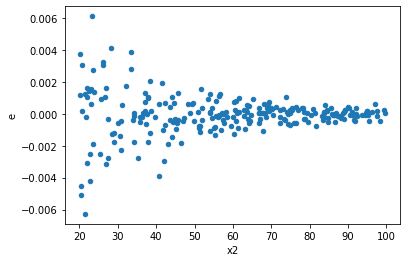

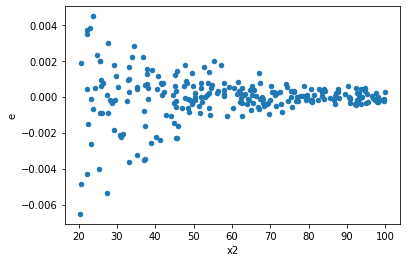

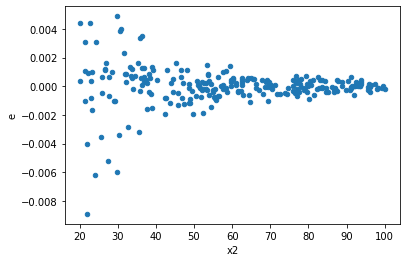

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
209.0,96.0,96.0,0.00018504389723439854,0.00019934267771437242,1.9275405961916514e-06,2.076486226191379e-06,1.0772723699277764,0.7161179367417316,0.6419410316291342,0.3580589683708658,Reject001=1 : Homoscedasticity
861.0,96.0,96.0,0.00015336816243823493,0.0001604604869178188,1.5975850253982806e-06,1.6714634053939458e-06,1.0462437859776805,0.8251859539941573,0.5874070230029214,0.41259297699707864,Reject001=1 : Homoscedasticity
993.0,96.0,96.0,0.0001370555919602843,0.0001495489339390396,1.4276624162529615e-06,1.5578013951983292e-06,1.0911552881576374,0.6699667997841261,0.665016600107937,0.33498339989206305,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,96.0,96.0,0.00021001745208309495,0.00012228766177565067,2.187681792532239e-06,1.2738298101630277e-06,0.5822738089750116,0.008620523064086711,Reject001=0 : Heteroscedasticity
1.0,96.0,96.0,0.0002328412617405905,3.982744267783187e-05,2.425429809797818e-06,4.148691945607486e-07,0.17104976317386478,3.6386241442360494e-16,Reject001=0 : Heteroscedasticity
2.0,96.0,96.0,0.0003120738270750789,5.57791848205049e-05,3.250769032032072e-06,5.810331752135927e-07,0.1787371448073584,1.6262620359849186e-15,Reject001=0 : Heteroscedasticity
3.0,96.0,96.0,0.00014314320483612377,9.575303919722857e-05,1.4910750503762892e-06,9.974274916377977e-07,0.668931782733596,0.05021999515587374,Reject001=1 : Homoscedasticity
4.0,96.0,96.0,0.000132444148801482,7.187810978957639e-05,1.3796265500154374e-06,7.487303103080873e-07,0.5427050605105486,0.0030395377399615193,Reject001=0 : Heteroscedasticity
5.0,96.0,96.0,0.00017852725892072033,3.1283446580990055e-05,1.8596589470908369e-06,3.258692352186464e-07,0.17523064416108175,8.305266225642028e-16,Reject001=0 : Heteroscedasticity
6.0,96.0,96.0,0.00016823102232591723,0.0001296614944363066,1.7524064825616379e-06,1.3506405670448605e-06,0.7707347470379802,0.20385528570948322,Reject001=1 : Homoscedasticity
7.0,96.0,96.0,0.0002686629481766237,7.626908617962233e-05,2.7985723768398306e-06,7.944696477043993e-07,0.28388390247799145,2.4269327386675988e-09,Reject001=0 : Heteroscedasticity
8.0,96.0,96.0,0.00026689546770388247,8.020322010053763e-05,2.7801611219154423e-06,8.354502093806003e-07,0.3005042415689209,1.1212178509530395e-08,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    946
Reject001=1 : Homoscedasticity       54
Name: Result_test, dtype: int64